# Forward Selection

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
claremont = pd.read_csv('claremont.csv')
claremont_test = pd.read_csv('claremont_test.csv')

In [4]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 110137.77
R^2: 0.8746


# OLS

In [105]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 
            'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 138945.54
R^2: 0.8005


# Lasso

In [107]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [108]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

277361.7386973024

In [109]:
alpha = 10_000

lasso_model = Lasso(alpha=alpha)
scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

251032.6084490382

In [110]:
alpha = 50_000

lasso_model = Lasso(alpha=alpha)
scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

256994.07522835786

In [111]:
alphas = np.linspace(0, 50_000, 100)

In [114]:
results = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

    rmse = np.sqrt(np.mean(-scores))
    results.append(rmse)

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e+11, tolerance: 6.999e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

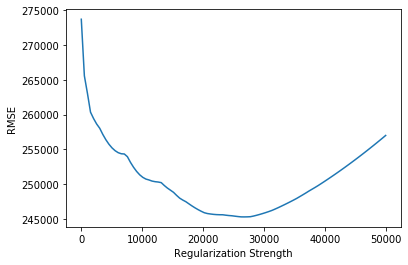

In [115]:
plt.plot(alphas, results)

plt.xlabel("Regularization Strength")
plt.ylabel("RMSE");

In [43]:
arg_with_best_rmse = np.argmin(results)
best_alpha = alphas[arg_with_best_rmse]

In [44]:
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print('Alpha: {:.2f}'.format(best_alpha))
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

Alpha: 26767.68
RMSE: 127652.40
R^2: 0.8316


In [47]:
list(zip(features, lasso_model.coef_))

[('floor_area', 140900.12583737916),
 ('latitude', -113777.66667522468),
 ('bedrooms', 166672.15976171923),
 ('garage', 47198.548716181576),
 ('bathrooms', -0.0),
 ('nearest_stn_dist', 41213.45125841991),
 ('build_year', -0.0),
 ('longitude', 0.0),
 ('nearest_sch_rank', -0.0),
 ('nearest_sch_dist', -0.0),
 ('cbd_dist', 0.0),
 ('land_area', 0.0)]

In [50]:
non_zero_features = [feature for (feature, coef) in zip(features, lasso_model.coef_) if abs(coef) > 1e-8]
non_zero_features

['floor_area', 'latitude', 'bedrooms', 'garage', 'nearest_stn_dist']

In [51]:
X_train = claremont[non_zero_features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[non_zero_features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 148685.00
R^2: 0.7715


In [53]:
list(zip(non_zero_features, model.coef_))

[('floor_area', 145244.5752603357),
 ('latitude', -127684.15529714093),
 ('bedrooms', 186193.07915497466),
 ('garage', 64314.10439102996),
 ('nearest_stn_dist', 63347.48694280176)]

In [54]:
list(zip(features, lasso_model.coef_))

[('floor_area', 140900.12583737916),
 ('latitude', -113777.66667522468),
 ('bedrooms', 166672.15976171923),
 ('garage', 47198.548716181576),
 ('bathrooms', -0.0),
 ('nearest_stn_dist', 41213.45125841991),
 ('build_year', -0.0),
 ('longitude', 0.0),
 ('nearest_sch_rank', -0.0),
 ('nearest_sch_dist', -0.0),
 ('cbd_dist', 0.0),
 ('land_area', 0.0)]

# Ridge

In [55]:
from sklearn.linear_model import Ridge

In [56]:
X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

277361.7386973024

In [68]:
alpha = 1

model = Ridge(alpha=alpha)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

251686.98376466564

In [69]:
alpha = 10

model = Ridge(alpha=alpha)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

np.sqrt(np.mean(-scores))

256774.1251655458

In [90]:
# alphas = np.linspace(0, 10, 100)
alphas = np.logspace(-6, 6, 100)

results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

    rmse = np.sqrt(np.mean(-scores))
    
    results.append((rmse, alpha))

In [91]:
best_rmse, best_alpha = sorted(results)[0]
best_alpha

2.6560877829466896

In [92]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print('Alpha: {:.2f}'.format(best_alpha))
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

Alpha: 2.66
RMSE: 116742.03
R^2: 0.8592


# Enet

In [96]:
from sklearn.linear_model import ElasticNetCV

In [93]:
alphas = np.logspace(-4, 0, 100)
ratios = np.linspace(0, 1, 20)

In [97]:
enet_model = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=5)
enet_model.fit(X_train, y_train)

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1520043444378.6514, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1470417092350.6416, tolerance: 699928850.4640001
  positive,
/Users/jameschok/a

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722428682189.394, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721798086518.3917, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/jameschok/anac

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550747390020.4098, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550566087324.3798, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550398073819.2664, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552095923957.472, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553161217781.4712, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553566158750.9554, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35485798463.40369, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121881951015.38062, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257013692313.3125, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1766468337.253418, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12241937915.709473, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56022489496.18555, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4554024838.213501, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25337755763.22473, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91345965877.03052, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641050892342.9747, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640884272613.7968, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640730174415.9316, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643486532258.2726, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643287423408.8887, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643053750101.0116, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1557086943.9089355, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10471598809.108154, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48534712464.22388, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631983243947.8031, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631898395781.2625, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631820315546.6973, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717368478737.4653, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717119576458.6848, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716875002206.667, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1720242702.6425781, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11875990289.186035, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55888232978.68921, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450367386441.81287, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448662370658.4777, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446968595855.48346, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increa

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5385405823.847778, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30701754734.362915, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105927747035.94019, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increa

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549698063155.3788, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549758610266.7937, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549770765869.5072, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640446424069.2736, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640349371194.6106, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640251694317.5094, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632074482151.3572, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631987878402.1638, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631905218266.5042, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714220491688.9485, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714125215515.5205, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714035860041.2689, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425598067676.54865, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424676740921.33154, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423811216248.1453, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increa

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548057646388.09283, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548053595278.52124, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548046990979.8337, tolerance: 699928850.4640001
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41229523811.81836, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100356316325.72717, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190343109917.55432, tolerance: 724468477.638889
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712626403079.8019, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712608100702.4937, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712591154131.8594, tolerance: 649779624.7962223
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409990667332.6212, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401555244719.45575, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377997870241.0313, tolerance: 696045987.774
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increas

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5065287590.606445, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5065290017.040039, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5065281931.084961, tolerance: 673363750.574
  positive,
/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase

ElasticNetCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.054802...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
             cv=5,
             l1_ratio=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]))

In [98]:
y_pred = enet_model.predict(X_test)

print('l1 ratio: {:.2f}'.format(enet_model.l1_ratio_))
print('Alpha: {:.2f}'.format(enet_model.alpha_))

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

l1 ratio: 0.68
Alpha: 0.25
RMSE: 115224.52
R^2: 0.8628
